# Importation des bibliothèques

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
%load_ext autoreload
%autoreload 2
from modele import Module_lineare
from modele import Module
from sequentiel import Sequentiel , Optim
from loss  import MSELoss
import utils as ut
import numpy as np
import matplotlib.pyplot as plt

import non_lineaire as nl
from sklearn.model_selection import train_test_split

In [4]:

uspsdatatrain = "./data/USPS_train.txt"
uspsdatatest = "./data/USPS_test.txt"
alltrainx,alltrainy = ut.load_usps(uspsdatatrain)
alltestx,alltesty = ut.load_usps(uspsdatatest)
neg = 6
pos = 9
datax,datay = ut.get_usps([neg,pos],alltrainx,alltrainy)
testx,testy = ut.get_usps([neg,pos],alltestx,alltesty)


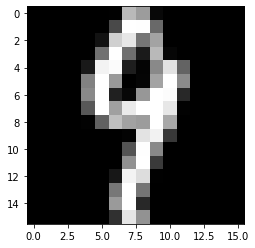

In [5]:
ut.show_usps(datax[datay==9][0])

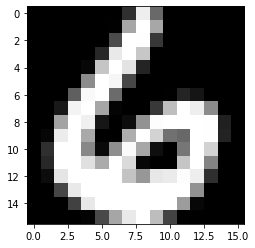

In [6]:
ut.show_usps(datax[datay==6][0])

In [7]:
datay.reshape(1,1308).shape

(1, 1308)

In [8]:
datax.shape

(1308, 256)

## Entraitenement : 

In [9]:
# Convertir en -1 ET 1  
datay_adapted = np.where(datay==6,0,1)
print("Classe 9 :",len(datay_adapted[datay_adapted==1]))
print("Classe 6 :",len(datay_adapted[datay_adapted==0]))

Classe 9 : 644
Classe 6 : 664


In [11]:
# Fonction de coût 
loss = MSELoss()

# Prametres de l'optimiser
batch_size = 20
epochs = 1000
eps = 1e-3

module1 = Module_lineare(input_size=256, output_size=100,biais=True)
activation_tanh = nl.TanH()
module2 = Module_lineare(input_size=100, output_size=10,biais=True)
activation_tanh_2 = nl.TanH()

module3 = Module_lineare(input_size=10, output_size=100,biais=True)
activation_tanh_3 = nl.TanH()
module4 = Module_lineare(input_size=100, output_size=256,biais=True)
activation_sigmoide = nl.Sigmoide()

encodeur = Sequentiel([module1 , activation_tanh , module2 ,activation_tanh_2,module3 , activation_tanh_3 , module4 ,activation_sigmoide])
# decodeur = Sequentiel([module3 , activation_tanh_3 , module4 ,activation_sigmoide])



In [12]:

optimiser = Optim(encodeur , loss , eps = eps)
losses = optimiser.SGD(datax , datax , batch_size , epochs)




In [13]:
print(losses)

[108.77092696342595, 86.08294380238067, 78.92950882726939, 75.30448614179797, 72.25514263892615, 70.6541627341113, 69.69889738072149, 68.87268699496991, 68.22152128843696, 67.40972112832401, 66.70019129977263, 66.12458982555759, 65.61812289409843, 65.18006382838784, 64.71712199221437, 64.29179851135581, 63.77410243993512, 63.464563818446216, 63.064113091608746, 62.8499727003601, 62.42021158763438, 62.13704499146695, 62.14447701332606, 61.85525229145754, 61.465782186110125, 61.2064456619982, 61.16659738000526, 60.887402756862365, 60.71034790338797, 60.69754082663136, 60.39514307167365, 60.331178768991215, 60.24534799928227, 59.87041862457337, 59.738054741093215, 59.73293670676679, 59.727124201460526, 59.41388662468286, 59.20807241395718, 59.130450318472775, 58.998576771491734, 58.9215533443121, 58.75876904396091, 58.63272558969577, 58.56904823485144, 58.40568821226388, 58.391511048809036, 58.32517851647526, 58.24344539092867, 58.050815808286686, 58.25631292127533, 58.025149183100595, 57

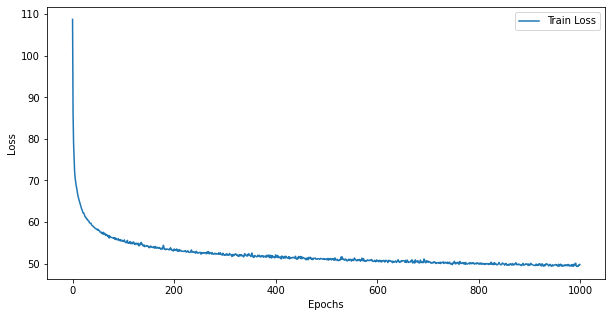

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



### TEST SUR LE TRAIN : 

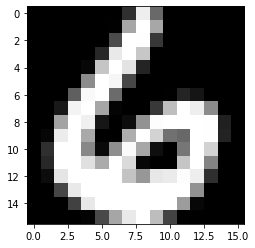

In [39]:
ut.show_usps(datax[:10][0])

In [52]:
resultat_train = optimiser._net.forward(datax)

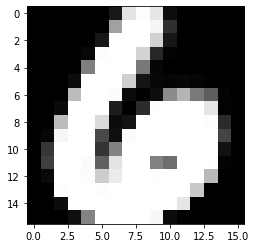

In [53]:
ut.show_usps(resultat_train[:10][0])

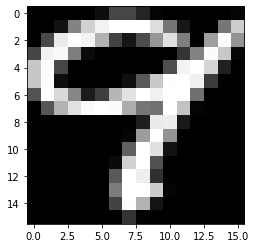

In [46]:

ut.show_usps(datax[datay_adapted==1][199])


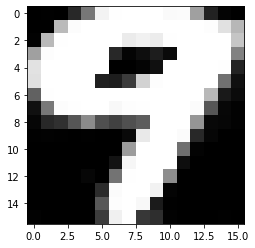

In [54]:
#Prediction sur l'ensemble de train :
ut.show_usps(resultat_train[datay_adapted==1][199])

### TEST SUR LE TEST :

In [50]:
resulta_test = optimiser._net.forward(testx)

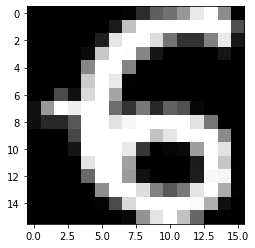

In [48]:
ut.show_usps(testx[:20][19])

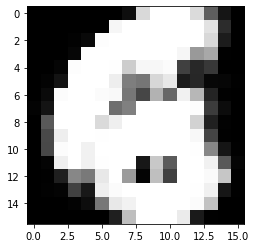

In [51]:
ut.show_usps(resulta_test[:20][19])
